In [19]:
# Machine Learning
# Train and Test
""" __summary__
Training data
Independent variables and Dependent variables
Divide data: x, y
train_x, train_y, test_x, test_y
x_train, x_test, y_train, y_test

Splitting data
Divide data into subsets
Larger portion for Training
80% of training data, 20% of test data
"""

' __summary__\nTraining data\nIndependent variables and Dependent variables\nDivide data: x, y\ntrain_x, train_y, test_x, test_y\nx_train, x_test, y_train, y_test\n\nSplitting data\nDivide data into subsets\nLarger portion for Training\n80% of training data, 20% of test data\n'

## Decision Tree Model

In [20]:
# import libraries
import numpy as np  # linear algebra
import pandas as pd  # data preparation and processing or data manipulation
import seaborn as sns  # statistical data visualization
import matplotlib.pyplot as plt  # plotting and data visualization
%matplotlib_inline

import graphviz # visualisation of the leaf nodes
# ML library 
from sklearn.model_selection import train_test_split

# Control display |  Optional
pd.options.display.max_columns=50
sns.set(style= "dargrid", rc={'axes.facecolor': '#616E7C'})

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib_inline` not found.


In [21]:
# Load the dataset
df = pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [22]:
# Show number of people with heart disease
# Column for target
df.target.value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [23]:
# Show percentage of Male and Female
count_male = len(df[df.sex == 1])
count_female = len(df[df.sex == 0])
# Show output
print('Percentage of female patients: {:.2f}%'.format(count_female/len(df.sex)*100))
print('Percentage of male patients: {:.2f}%'.format(count_male/len(df.sex)*100))

Percentage of female patients: 30.44%
Percentage of male patients: 69.56%


In [24]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


In [25]:
# Show null values 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [26]:
# ML train and test data
# Create Logistic regression
y_data = df.target.values
x_data = df.drop({'target'}, axis=1)

In [27]:
# Split data for training 70% and testing 30%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.30, random_state=42)

In [28]:
# Check shape of data remaining
X_train.shape, X_test.shape

((717, 13), (308, 13))

In [29]:
# Check the datatype
X_train.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object

In [30]:
# Check x_train header
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
479,58,1,0,128,216,0,0,131,1,2.2,1,3,3
227,44,0,2,118,242,0,1,149,0,0.3,1,1,2
910,50,1,2,140,233,0,1,163,0,0.6,1,1,3
362,43,0,2,122,213,0,1,165,0,0.2,1,0,2


In [31]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
# Predict the class label for the test data using the decision tree classifier
y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model Accuracy:{0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))

Model Accuracy:0.8052


In [33]:
# Predict class label for training data using decision tree classifier
y_pred_train_gini = clf_gini.predict(X_train)

In [34]:
# Print the training set
print('Training-set accuracy:{0:0.4f}'.format(clf_gini.score(X_train, y_train)))
print('Testing-set accuracy:{0:0.4f}'.format(clf_gini.score(X_test, y_test)))

Training-set accuracy:0.8577
Testing-set accuracy:0.8052


[Text(0.5, 0.875, 'x[2] <= 0.5\ngini = 0.499\nsamples = 717\nvalue = [340, 377]'),
 Text(0.25, 0.625, 'x[11] <= 0.5\ngini = 0.38\nsamples = 345\nvalue = [257, 88]'),
 Text(0.125, 0.375, 'x[12] <= 2.5\ngini = 0.499\nsamples = 152\nvalue = [72, 80]'),
 Text(0.0625, 0.125, 'gini = 0.339\nsamples = 88\nvalue = [19, 69]'),
 Text(0.1875, 0.125, 'gini = 0.285\nsamples = 64\nvalue = [53, 11]'),
 Text(0.375, 0.375, 'x[3] <= 109.0\ngini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.3125, 0.125, 'gini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.4375, 0.125, 'gini = 0.043\nsamples = 183\nvalue = [179, 4]'),
 Text(0.75, 0.625, 'x[12] <= 2.5\ngini = 0.347\nsamples = 372\nvalue = [83, 289]'),
 Text(0.625, 0.375, 'x[9] <= 2.1\ngini = 0.225\nsamples = 278\nvalue = [36, 242]'),
 Text(0.5625, 0.125, 'gini = 0.174\nsamples = 260\nvalue = [25, 235]'),
 Text(0.6875, 0.125, 'gini = 0.475\nsamples = 18\nvalue = [11, 7]'),
 Text(0.875, 0.375, 'x[7] <= 142.5\ngini = 0.5\nsamples = 94\nvalue = [47, 47]

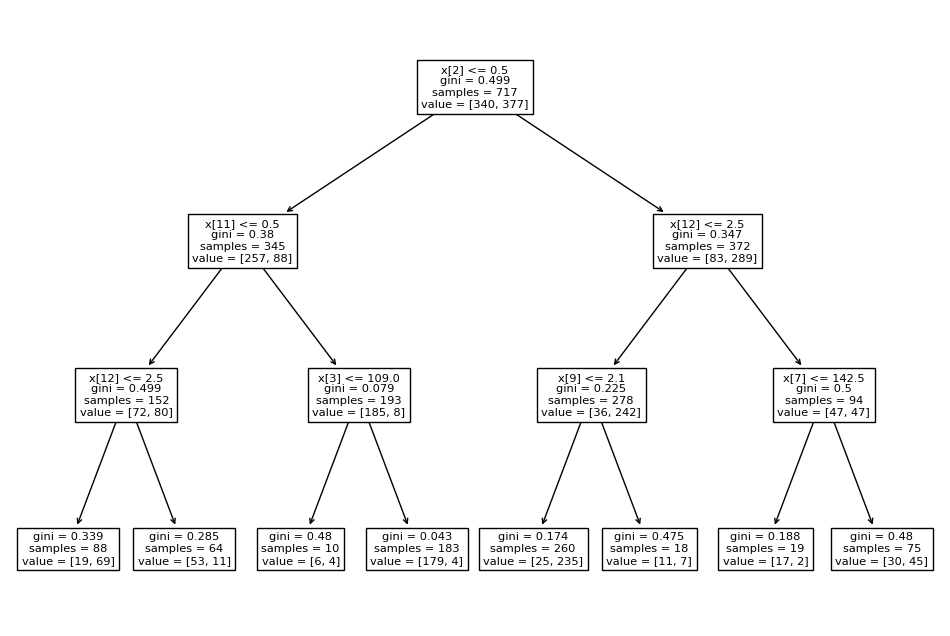

In [35]:
# 1. Visual Decision tree leaf Node
plt.figure(figsize=(12,8))  # Create figure for width and height

from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train,y_train))

In [36]:
# Visualisation of decision tree
# Load the data
y = df['target'].values
x_data = df.drop(['target'], axis=1)

# Train the decision tree classifier
model = tree.DecisionTreeClassifier()
model.fit(x_data, y)

# Get the class name from the data
class_name = df['target'].unique().astype(str)

# Generate the graghviz visualisation
tree.export_graphviz(model, out_file='heart_disease_new.dot',
                     feature_names=x_data.columns,
                     class_names=class_name,
                     label='all',
                     filled=True, rounded=True)